In [1]:
#Initial imports 
import numpy as np
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #Show all consecutive outputs
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Removes all unnecessary warnings by Python
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports for better visualization

from collections import defaultdict
import scipy as sp
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (14, 6)
rcParams['figure.dpi'] = 250
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 3
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 25
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'

In [4]:
#Show all the columns 
pd.set_option('display.max_columns',None)

In [5]:
train = pd.read_csv("aaaa/train.csv") 

In [6]:
train.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [7]:
train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,NaN,NaN,2.152500,0.000000,NaN,48.000000,67.000000,2.000000
50%,38.200000,NaN,NaN,2.895000,0.000000,NaN,50.000000,74.000000,2.000000
75%,60.730000,NaN,NaN,3.582500,1.000000,NaN,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [9]:
train.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           71030
Var2                               0
Var3                               0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [11]:
test = pd.read_csv("aaaa/test.csv") 

In [12]:
test.isnull().sum()

Trip_ID                            0
Trip_Distance                      0
Type_of_Cab                    13158
Customer_Since_Months           3966
Life_Style_Index               13327
Confidence_Life_Style_Index    13327
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Var1                           46789
Var2                               0
Var3                               0
Gender                             0
dtype: int64

In [14]:
train.shape

(131662, 14)

In [16]:
test.shape

(87395, 13)

In [17]:
train['Surge_Pricing_Type'].value_counts()

2    56728
3    47720
1    27214
Name: Surge_Pricing_Type, dtype: int64

In [19]:
train.corr()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
Trip_Distance,1.000000,0.116812,0.509482,-0.054654,-0.007686,-0.045468,0.200456,0.231706,0.135928
Customer_Since_Months,0.116812,1.000000,0.135114,-0.050349,-0.006325,-0.009856,0.042637,0.113403,0.027827
Life_Style_Index,0.509482,0.135114,1.000000,0.205824,0.074023,-0.091307,0.234754,0.329312,-0.080108
Customer_Rating,-0.054654,-0.050349,0.205824,1.000000,0.003595,-0.010968,-0.302968,-0.227531,-0.155279
Cancellation_Last_1Month,-0.007686,-0.006325,0.074023,0.003595,1.000000,0.010953,0.095830,0.128686,0.185646
Var1,-0.045468,-0.009856,-0.091307,-0.010968,0.010953,1.000000,-0.046755,-0.061993,-0.040735
Var2,0.200456,0.042637,0.234754,-0.302968,0.095830,-0.046755,1.000000,0.683437,0.003437
Var3,0.231706,0.113403,0.329312,-0.227531,0.128686,-0.061993,0.683437,1.000000,-0.039309
Surge_Pricing_Type,0.135928,0.027827,-0.080108,-0.155279,0.185646,-0.040735,0.003437,-0.039309,1.000000


In [20]:
traina = pd.read_csv("aaaa/train1.csv") 
testa = pd.read_csv("aaaa/test1.csv")

In [21]:
traina.head()
testa.head()

,Trip_ID,TD,TOC,CSM,LSI,CLSI,DT,CR,CLM,Var1,Var2,Var3,Gender,y
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


,Trip_ID,TD,TOC,CSM,LSI,CLSI,DT,CR,CLM,Var1,Var2,Var3,Gender
0,T0005689459,9.44,A,10.0,2.57438,A,B,3.68000,2,NaN,46,63,Male
1,T0005689462,32.15,B,10.0,2.85143,A,A,1.59375,0,65.0,49,80,Female
2,T0005689463,10.38,C,4.0,2.70530,A,D,4.50500,0,NaN,47,74,Male
3,T0005689466,14.94,NaN,6.0,2.48159,C,E,4.53000,0,63.0,43,54,Male
4,T0005689468,32.03,B,7.0,2.81598,A,K,4.60125,3,96.0,44,56,Male


In [26]:
traina['TOC'].value_counts()/131662
testa['TOC'].value_counts()/87395
traina['CSM'].value_counts()/131662
testa['CSM'].value_counts()/87395
traina['CLSI'].value_counts()/131662
testa['CLSI'].value_counts()/87395
traina['DT'].value_counts()/131662
testa['DT'].value_counts()/87395
traina['CLM'].value_counts()/131662
testa['CLM'].value_counts()/87395

B    0.236484
C    0.213592
A    0.163821
D    0.144241
E    0.088363
Name: TOC, dtype: float64

B    0.233984
C    0.212941
A    0.163728
D    0.147537
E    0.091252
Name: TOC, dtype: float64

10.0    0.324163
2.0     0.088264
3.0     0.078618
0.0     0.077236
5.0     0.065630
1.0     0.063017
4.0     0.058681
7.0     0.056258
6.0     0.056015
8.0     0.048062
9.0     0.039093
Name: CSM, dtype: float64

10.0    0.321952
2.0     0.089525
3.0     0.076927
0.0     0.076847
5.0     0.065953
1.0     0.064855
4.0     0.060747
7.0     0.056353
6.0     0.056113
8.0     0.048023
9.0     0.037325
Name: CSM, dtype: float64

B    0.306505
C    0.273177
A    0.266949
Name: CLSI, dtype: float64

B    0.307912
C    0.271972
A    0.267624
Name: CLSI, dtype: float64

A    0.589365
B    0.224476
C    0.056843
D    0.050037
E    0.020636
F    0.014811
G    0.011309
H    0.009570
I    0.006175
J    0.005279
K    0.005165
L    0.004884
N    0.000744
M    0.000706
Name: DT, dtype: float64

A    0.588283
B    0.224704
C    0.056216
D    0.051456
E    0.020962
F    0.014555
G    0.011717
H    0.009886
I    0.005961
J    0.005389
K    0.004829
L    0.004680
M    0.000767
N    0.000595
Name: DT, dtype: float64

0    0.521692
1    0.279762
2    0.123217
3    0.054245
4    0.013846
5    0.005074
6    0.002020
7    0.000122
8    0.000023
Name: CLM, dtype: float64

0    0.520911
1    0.279913
2    0.124195
3    0.054156
4    0.014074
5    0.004726
6    0.001899
7    0.000069
8    0.000057
Name: CLM, dtype: float64

In [27]:
traina.head()

,Trip_ID,TD,TOC,CSM,LSI,CLSI,DT,CR,CLM,Var1,Var2,Var3,Gender,y
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


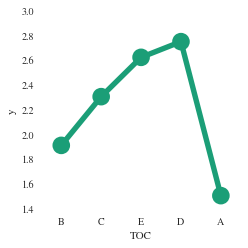

In [28]:
sns.factorplot('TOC','y',data=traina)

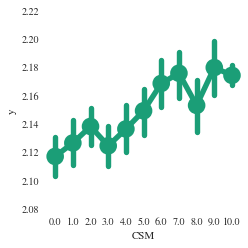

In [29]:
sns.factorplot('CSM','y',data=traina)


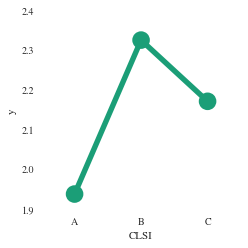

In [30]:
sns.factorplot('CLSI','y',data=traina)

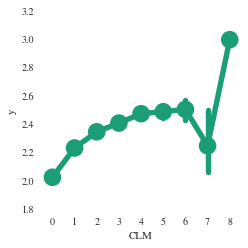

In [31]:
sns.factorplot('CLM','y',data=traina)

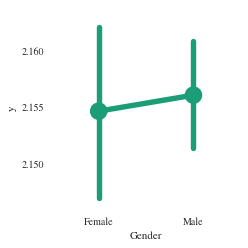

In [32]:
sns.factorplot('Gender','y',data=traina)

In [40]:
traina['Var1'].value_counts()

39.0     1259
42.0     1221
38.0     1208
43.0     1190
37.0     1180
40.0     1163
36.0     1123
48.0     1123
45.0     1107
44.0     1087
50.0     1084
46.0     1073
49.0     1064
41.0     1063
47.0     1016
52.0      985
51.0      981
57.0      967
54.0      963
59.0      957
58.0      956
56.0      944
55.0      936
63.0      936
53.0      935
60.0      891
66.0      878
61.0      878
35.0      874
72.0      865
         ... 
129.0       2
165.0       2
117.0       2
159.0       1
160.0       1
161.0       1
154.0       1
156.0       1
200.0       1
163.0       1
169.0       1
148.0       1
171.0       1
173.0       1
179.0       1
149.0       1
135.0       1
146.0       1
144.0       1
141.0       1
139.0       1
136.0       1
133.0       1
132.0       1
131.0       1
128.0       1
122.0       1
120.0       1
119.0       1
210.0       1
Name: Var1, dtype: int64

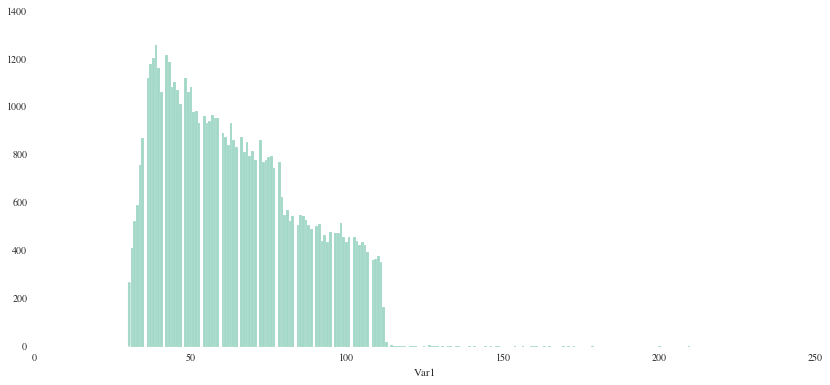

In [43]:
sns.distplot(traina["Var1"].dropna(),bins=210,kde=False)

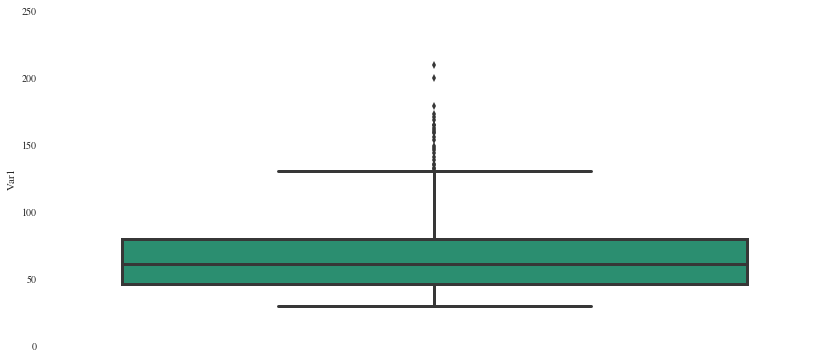

In [54]:
sns.boxplot(y='Var1',data=traina)

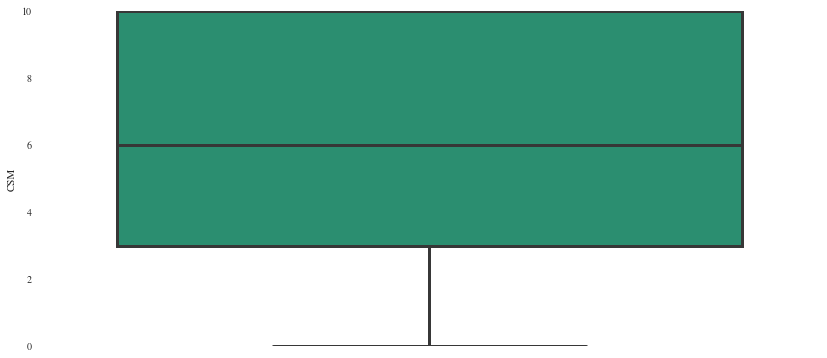

In [55]:
sns.boxplot(y='CSM',data=traina)

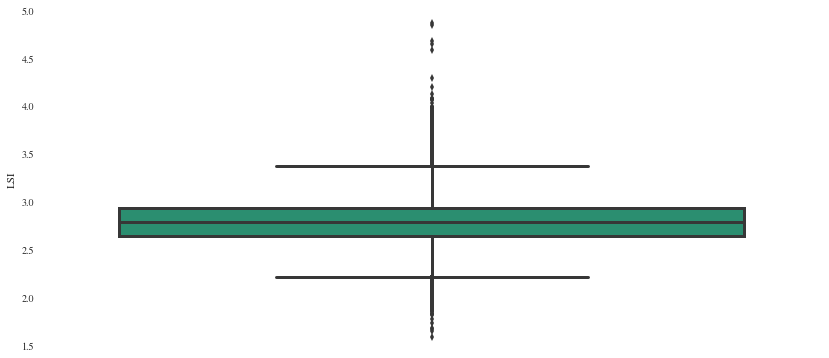

In [56]:
sns.boxplot(y='LSI',data=traina)

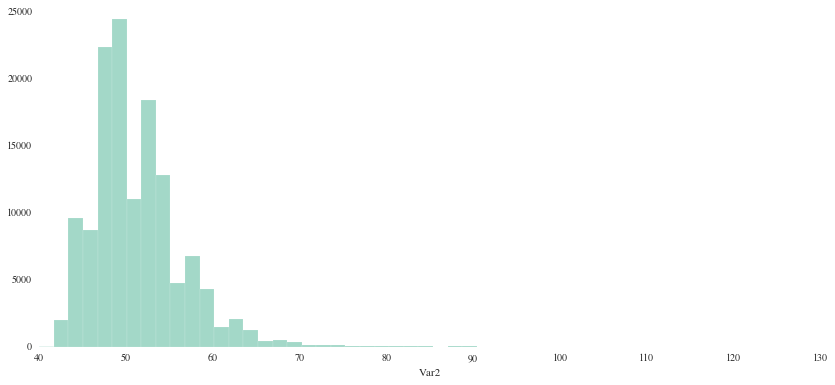

In [60]:
sns.distplot(traina["Var2"].dropna(),bins=50,kde=False)

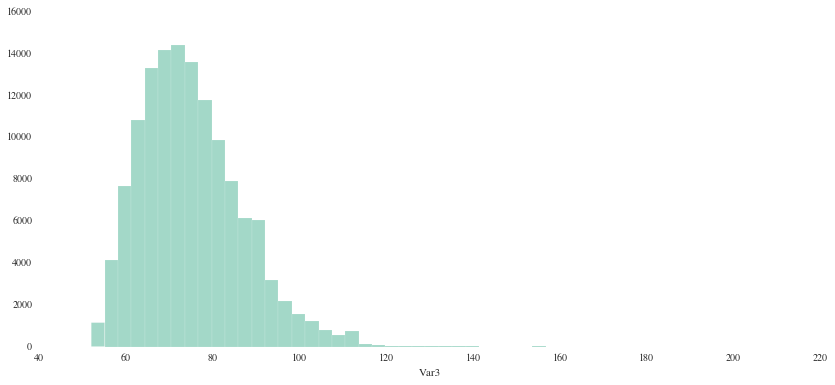

In [61]:
sns.distplot(traina["Var3"].dropna(),bins=50,kde=False)

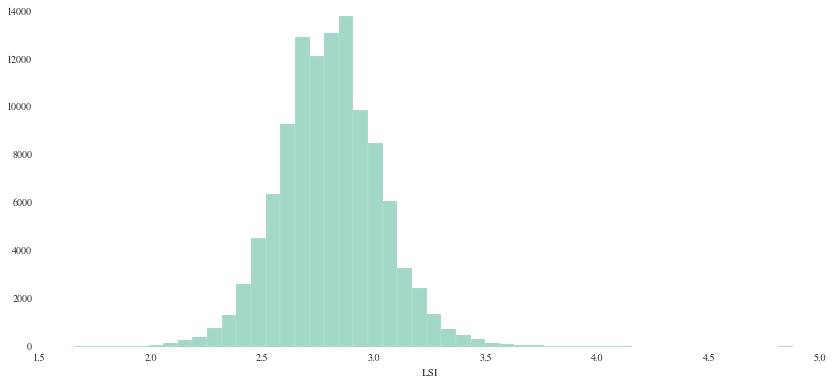

In [62]:
sns.distplot(traina["LSI"].dropna(),bins=50,kde=False)

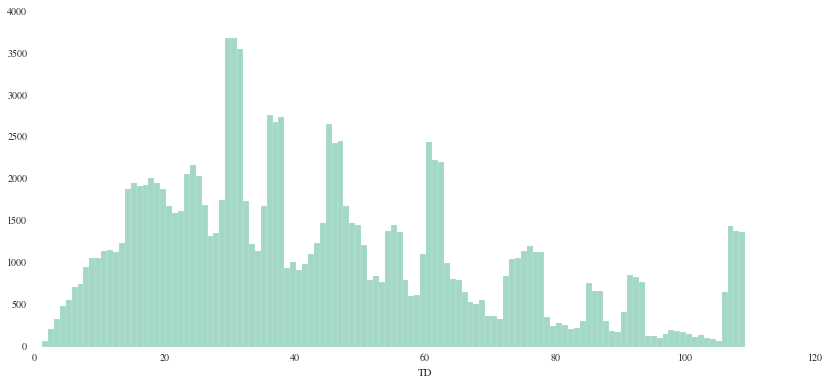

In [64]:
sns.distplot(traina["TD"].dropna(),bins=120,kde=False)

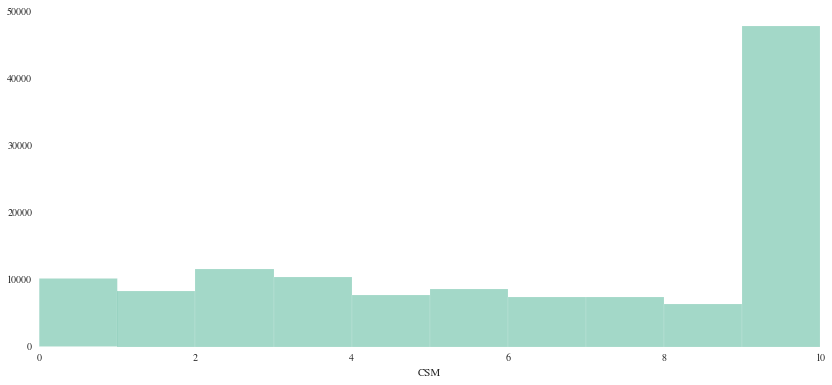

In [66]:
sns.distplot(traina["CSM"].dropna(),bins=10,kde=False)

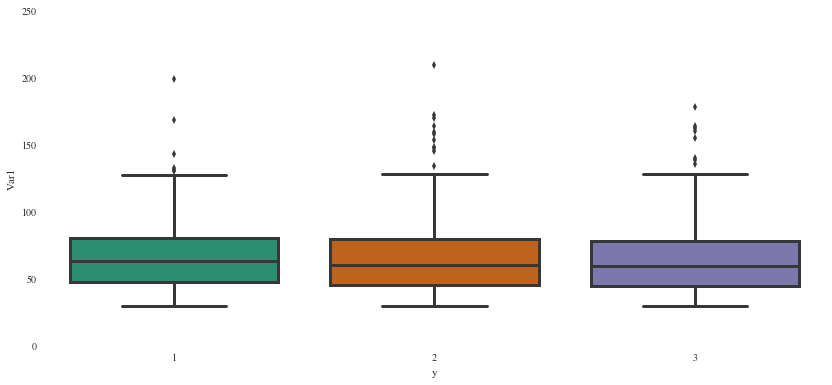

In [69]:
sns.boxplot(y='Var1',x='y',data=traina)

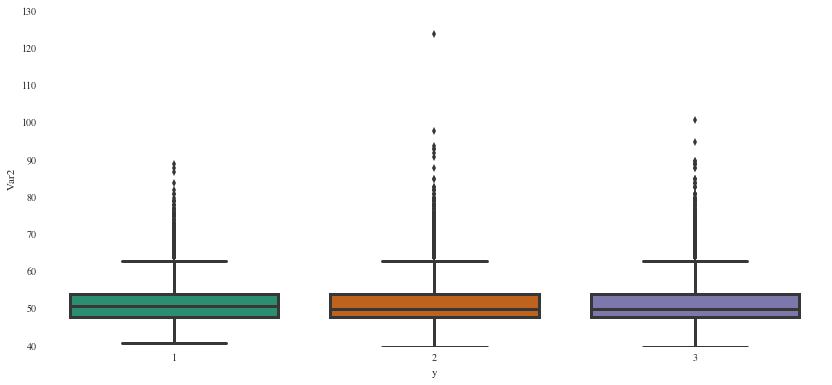

In [70]:
sns.boxplot(y='Var2',x='y',data=traina)

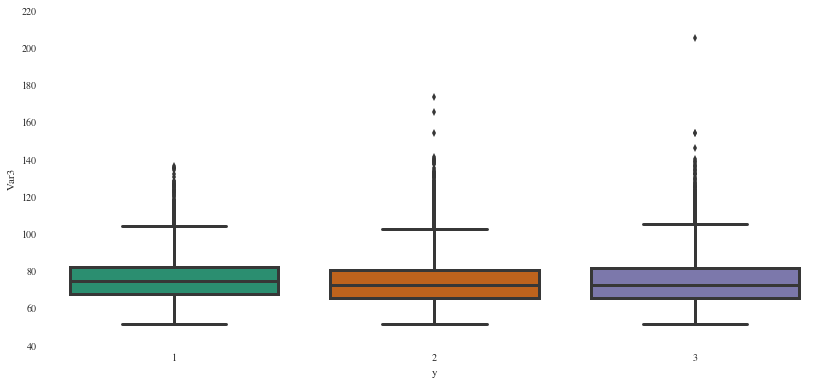

In [71]:
sns.boxplot(y='Var3',x='y',data=traina)

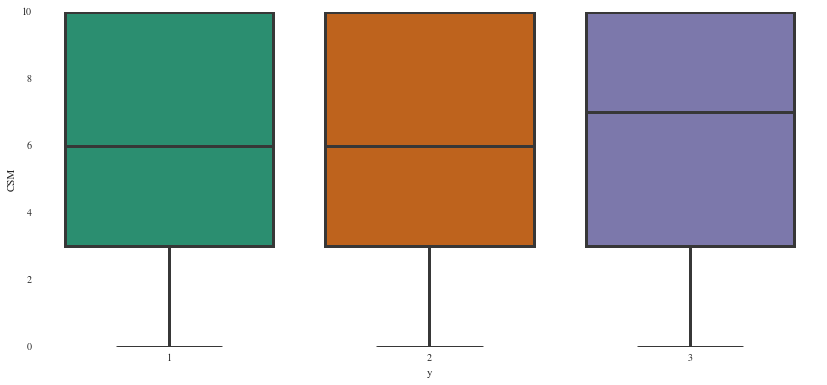

In [72]:
sns.boxplot(y='CSM',x='y',data=traina)

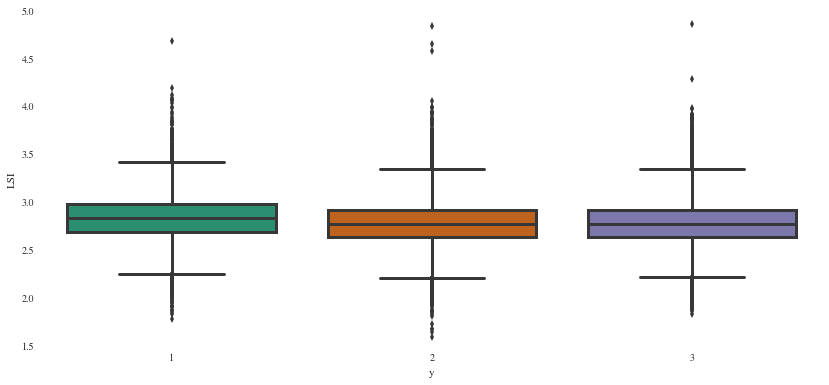

In [73]:
sns.boxplot(y='LSI',x='y',data=traina)

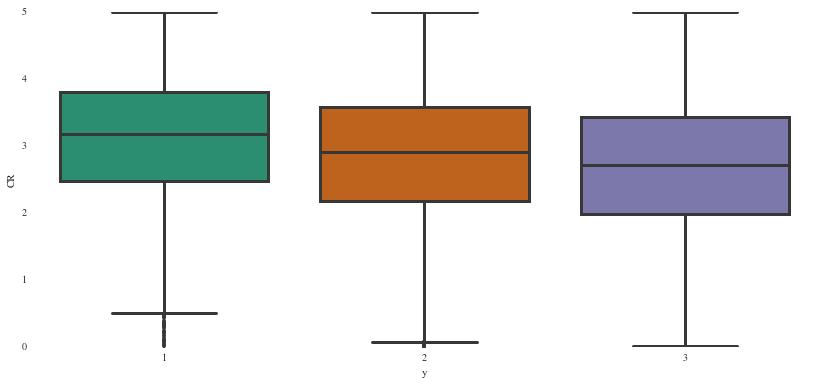

In [74]:
sns.boxplot(y='CR',x='y',data=traina)

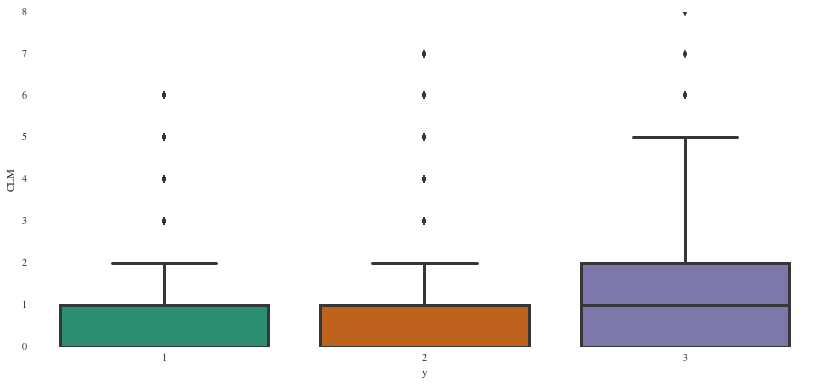

In [75]:
sns.boxplot(y='CLM',x='y',data=traina)

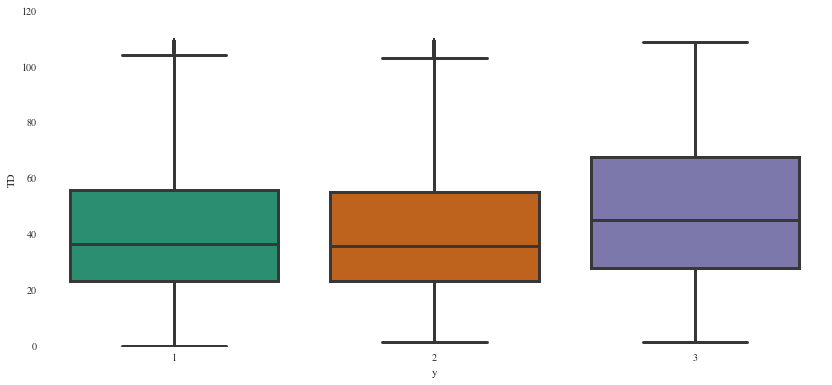

In [76]:
sns.boxplot(y='TD',x='y',data=traina)

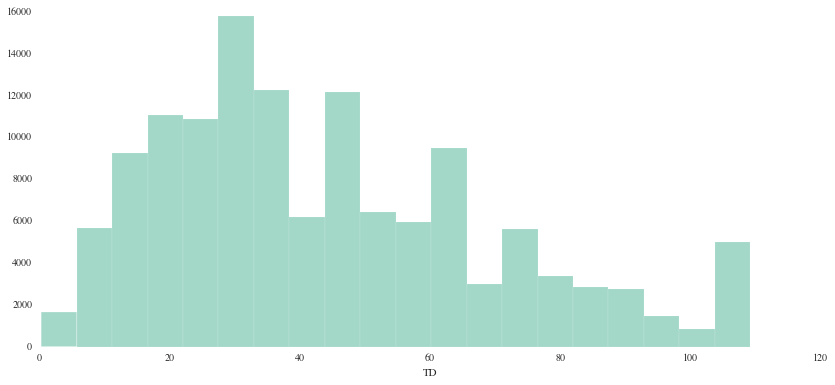

In [84]:
sns.distplot(traina["TD"].dropna(),bins=20,kde=False)

In [88]:
traina['TDL'] = np.sqrt((traina['TD']+1))


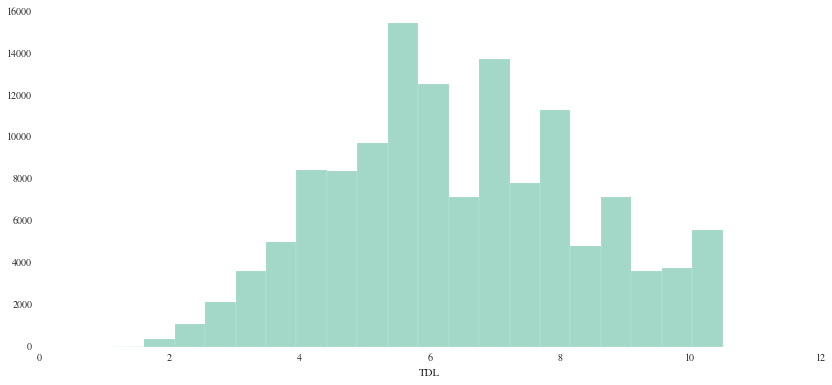

In [89]:
sns.distplot(traina["TDL"].dropna(),bins=20,kde=False)

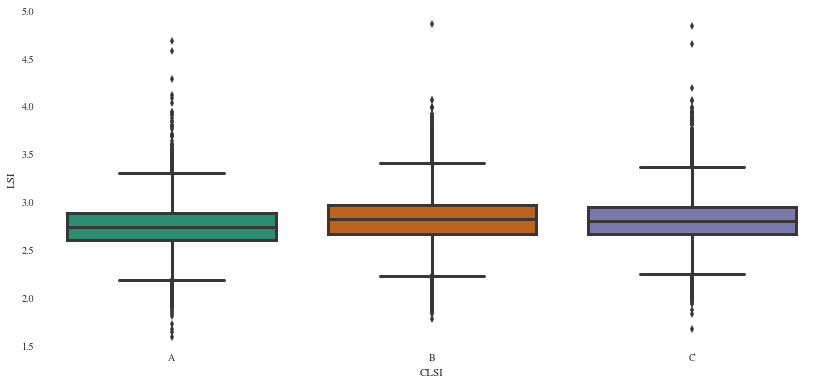

In [92]:
sns.boxplot(x='CLSI',y='LSI',data=traina)

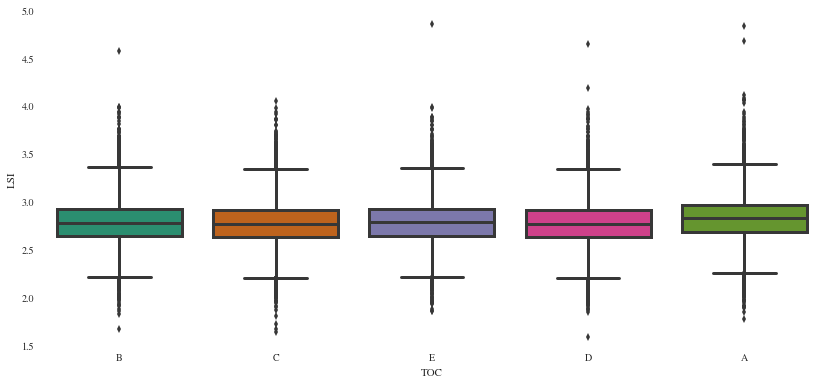

In [93]:
sns.boxplot(x='TOC',y='LSI',data=traina)

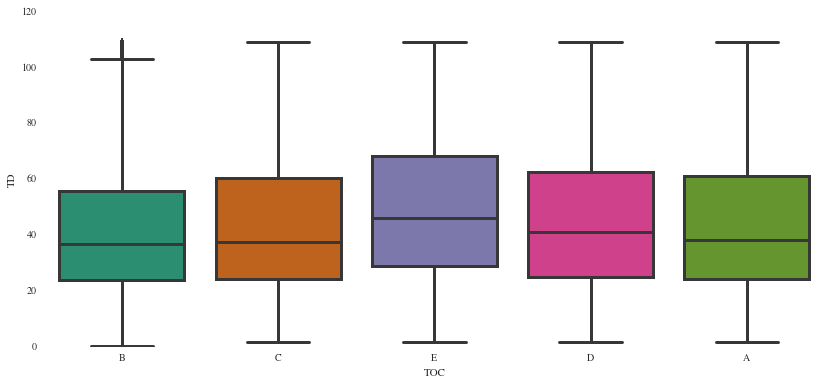

In [95]:
sns.boxplot(x='TOC',y='TD',data=traina)

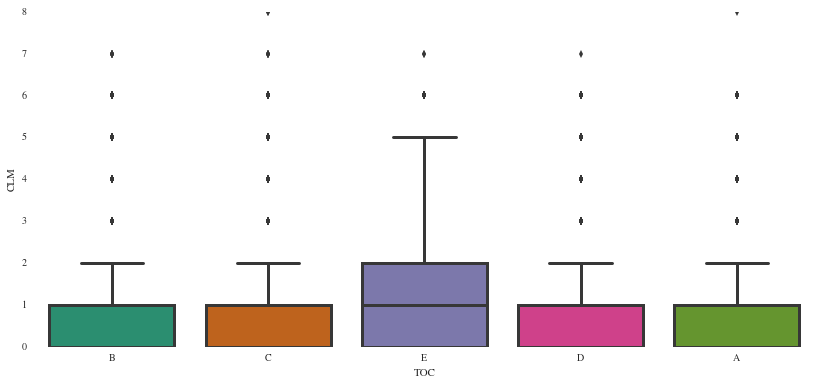

In [97]:
sns.boxplot(x='TOC',y='CLM',data=traina)

In [ ]:
traina['TOC'].unique.value_counts()